## Import Modules

In [71]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

## Training set

In [96]:
ch = (
        pd.read_csv('../not_on_git/mw_cat/chandra_all_sources_v2.csv', index_col='name')
        .drop(columns=['ra' , 'dec' , 'significance' , 'err_ellipse_r1' , 'err_ellipse_r0'])
    )
ch_id = pd.read_csv('compiled_data_v3/id_frame.csv' , index_col='name')
ch = pd.merge(ch_id , ch , left_index=True , right_index =True , how='left')
#ch = ch[ch['offset']<1.01]
ch = ch[ch['significance']>5]
ch 

/home/kumaran/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,catalog,class,significance,cat_name,var_flag_x,streak_src_flag_x,pileup_flag_x,ra,dec,offset,...,var_inter_hard_prob_ms,var_intra_index_b,var_intra_prob_b,ks_intra_prob_b,kp_intra_prob_b,var_inter_index_b,var_inter_prob_b,var_inter_sigma_b,gal_l2,gal_b2
name,,,,,,,,,,,,,,,,,,,,,
2CXO J174041.4-534004,hea,CV,64.727180,1WGA J1740.6-5340,0,0,0,265.172853,-53.667935,0.000230,...,0.929185,0.0,0.199549,0.816012,0.823616,8.0,1.000000,1.093973e-05,338.169913,-11.955034
2CXO J002409.2-720543,hea,CV,6.103520,CXOGLB J002409.2-720543,1,0,0,6.038483,-72.095544,0.000235,...,0.547695,1.0,0.629806,0.948153,0.890983,6.0,0.999984,6.639804e-07,305.885422,-44.875913
2CXO J002411.1-720620,hea,CV,13.755014,CXOGLB J002411.0-720620,1,0,0,6.046367,-72.105583,0.000313,...,0.769200,2.0,0.838357,0.988519,0.984101,5.0,0.830231,1.643134e-05,305.879929,-44.866347
2CXO J002401.4-720441,hea,CV,5.629648,CXOGLB J002401.4-720441,0,0,0,6.005988,-72.078311,0.000319,...,0.506490,2.0,0.727232,0.853618,0.985037,3.0,0.500566,2.693600e-07,305.903006,-44.891458
2CXO J002410.0-720441,hea,CV,8.279289,CXOGLB J002410.0-720441,0,0,0,6.042059,-72.078131,0.000486,...,0.942930,2.0,0.719760,0.979046,0.923995,0.0,0.092589,2.286408e-06,305.887553,-44.893295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J203122.0+410844,SPICY,YSO,5.142857,111527,0,0,0,307.841885,41.145634,9.941417,...,0.704634,0.0,0.312277,0.803918,0.751374,0.0,0.221087,2.523008e-07,79.878360,0.972667
2CXO J203238.0+411244,SPICY,YSO,5.352941,112213,1,0,0,308.158578,41.212319,9.972372,...,0.719506,9.0,1.000000,1.000000,1.000000,6.0,0.981941,1.888440e-06,80.073280,0.820094
2CXO J001444.6-391135,SKIFF,STAR,17.544338,[CHG2008] C1-7,1,0,0,3.685843,-39.193332,9.973566,...,0.352816,0.0,0.273823,0.830589,0.752805,0.0,0.271662,1.389467e-06,332.986199,-75.716920


In [94]:
print(ch.columns.to_list())

['catalog', 'class', 'significance', 'cat_name', 'var_flag_x', 'streak_src_flag_x', 'pileup_flag_x', 'ra', 'dec', 'offset', 'missing', 'sat_src_flag_x', 'extent_flag_x', 'conf_flag_x', 'cat_ra', 'cat_dec', 'conf_flag_y', 'extent_flag_y', 'sat_src_flag_y', 'gal_l', 'gal_b', 'significance2', 'likelihood', 'conf_flag2', 'dither_warning_flag', 'extent_flag2', 'pileup_flag_y', 'sat_src_flag2', 'streak_src_flag_y', 'var_flag_y', 'var_inter_hard_flag', 'flux_aper_b', 'flux_aper_lolim_b', 'flux_aper_hilim_b', 'flux_aper_h', 'flux_aper_lolim_h', 'flux_aper_hilim_h', 'flux_aper_m', 'flux_aper_lolim_m', 'flux_aper_hilim_m', 'flux_aper_s', 'flux_aper_lolim_s', 'flux_aper_hilim_s', 'flux_aper_u', 'flux_aper_lolim_u', 'flux_aper_hilim_u', 'hard_hm', 'var_inter_hard_prob_hm', 'var_inter_hard_sigma_hm', 'hard_hs', 'var_inter_hard_prob_hs', 'hard_ms', 'var_inter_hard_prob_ms', 'var_intra_index_b', 'var_intra_prob_b', 'ks_intra_prob_b', 'kp_intra_prob_b', 'var_inter_index_b', 'var_inter_prob_b', 'var_in

In [ ]:
# DO NOT RUN
ch = pd.read_csv('compiled_data_v3/x_phot.csv' , index_col='name')
ch_id = pd.read_csv('compiled_data_v3/id_frame.csv' , index_col='name')
ch.insert(0 , 'class' , ch_id['class'].to_list())
ch.insert(1 , 'offset' , ch_id['offset'].to_list())
ch.insert(2 , 'significance' , ch_id['significance'].to_list())
ch = ch[ch['offset']<1.01]
ch = ch[ch['significance']>3]
ch 

### Plot various properties

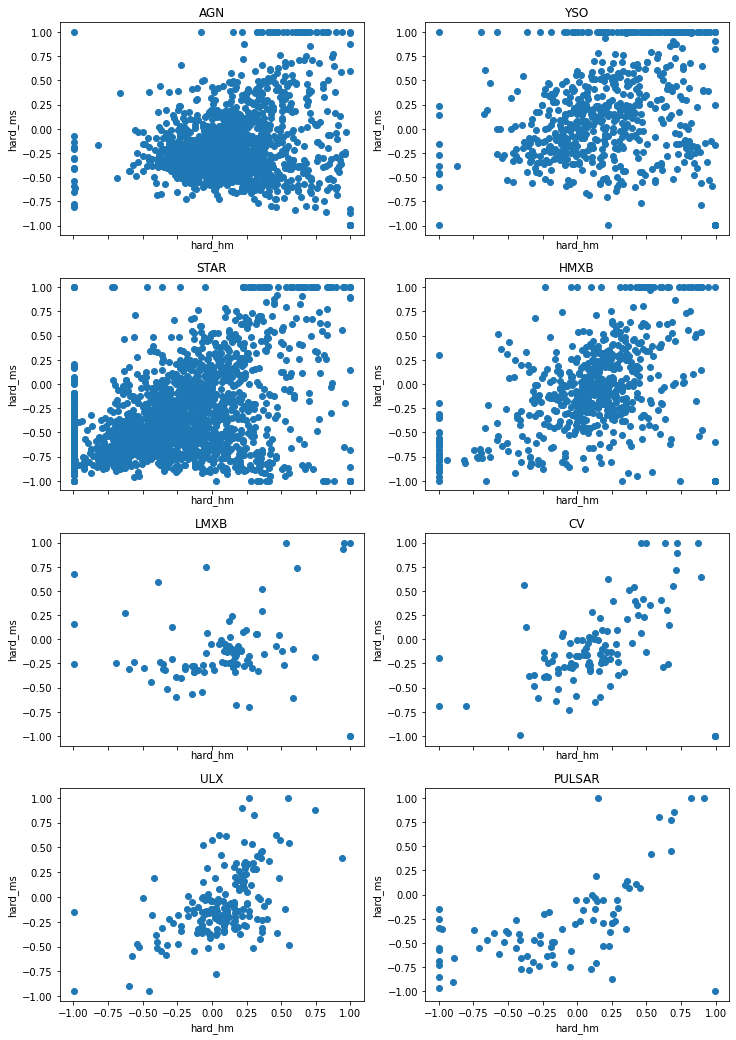

In [74]:
classes = ['AGN' , 'YSO' , 'STAR' , 'HMXB' , 'LMXB' , 'CV' , 'ULX' , 'PULSAR']
nrows  , ncols = 4 , 2 
fig , ax = plt.subplots(nrows=nrows , ncols=ncols , figsize=(12,18) ,sharex=True)
to_plot = ['hard_hm' , 'hard_ms']
cl = np.reshape(classes, ax.shape)
df = ch.copy()
for i in range(nrows):
    for j in range(ncols):
        temp = df[df['class']==cl[i][j]]
        if(len(to_plot)==1):
            ax[i][j].hist(temp[to_plot[0]] , label = cl[i][j])
            ax[i][j].hist(temp[to_plot[0]] , label = cl[i][j])
            ax[i][j].set_xlabel(to_plot[0])
        else:
            ax[i][j].scatter(temp[to_plot[0]] , temp[to_plot[1]] , label = cl[i][j])
            ax[i][j].set_xlabel(to_plot[0])
            ax[i][j].set_ylabel(to_plot[1])
        ax[i][j].set_title(cl[i][j])
plt.show()


/home/kumaran/.local/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


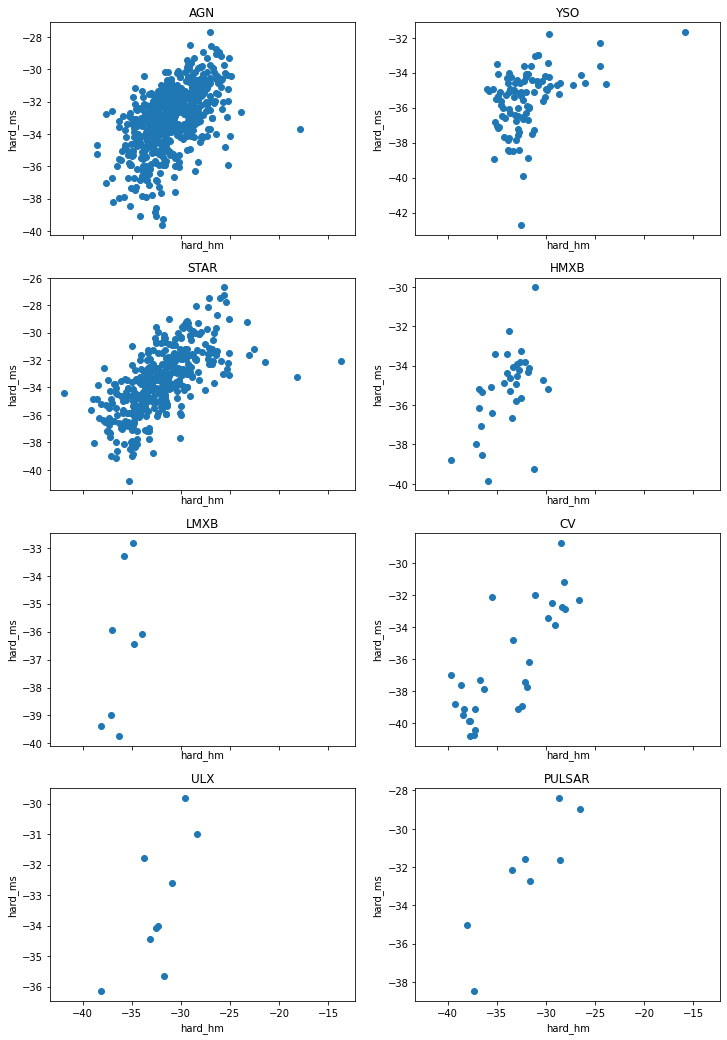

In [75]:
classes = ['AGN' , 'YSO' , 'STAR' , 'HMXB' , 'LMXB' , 'CV' , 'ULX' , 'PULSAR']
nrows  , ncols = 4 , 2 
fig , ax = plt.subplots(nrows=nrows , ncols=ncols , figsize=(12,18) ,sharex=True)
to_plot = ['hard_hm' , 'hard_ms']
cl = np.reshape(classes, ax.shape)
df = ch.copy()
for i in range(nrows):
    for j in range(ncols):
        temp = df[df['class']==cl[i][j]]
        temp = temp[~temp['h-csc'].isna()]
        temp = temp[~temp['m-csc'].isna()]
        temp = temp[~temp['s-csc'].isna()]
        #temp = temp[~temp['h-csc'].isna()]
        x = temp['h-csc']-temp['m-csc']
        y = temp['m-csc']-temp['s-csc']
        #print(len(x) , len(y))
        ax[i][j].scatter(np.log(x),np.log(y) , label = cl[i][j])
        ax[i][j].set_xlabel(to_plot[0])
        ax[i][j].set_ylabel(to_plot[1])
        ax[i][j].set_title(cl[i][j])
plt.show()


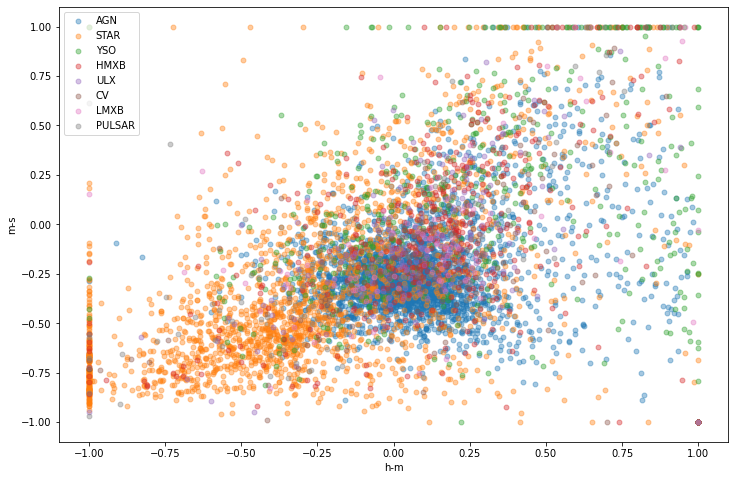

In [98]:
classes = ch['class'].value_counts().index.to_list()
nrows  , ncols = 1 , 1 
fig , ax = plt.subplots(nrows=nrows , ncols=ncols , figsize=(12,8) ,sharex=True)
to_plot = ['hard_hm' , 'hard_ms']
#cl = np.reshape(classes, ax.shape)
df = ch.copy()
for cl in classes:
    temp = df[df['class']==cl]
    temp = temp[~temp['flux_aper_h'].isna()]
    temp = temp[~temp['flux_aper_m'].isna()]
    temp = temp[~temp['flux_aper_s'].isna()]
    #temp = temp[~temp['h-csc'].isna()]
    x = (temp['flux_aper_h']-temp['flux_aper_m']) / (temp['flux_aper_h']+temp['flux_aper_m'])
    y = (temp['flux_aper_m']-temp['flux_aper_s'])/(temp['flux_aper_m']+temp['flux_aper_s'])
    #print(len(x) , len(y))
    x = temp['hard_hm']
    y = temp['hard_ms']
    ax.scatter((x),(y) , label = cl , s=24 , alpha=0.4)
    #ax.scatter(temp['hard_hm'],temp['hard_ms'] , label = cl , s=10 , alpha=0.6)
    ax.set_xlabel('h-m')
    ax.set_ylabel('m-s')
    #ax.set_title(cl[i][j])
plt.legend()
plt.show()
